<a href="https://colab.research.google.com/github/pooja614/ML_DL_projects/blob/main/Air_pollution(84_accuracy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Air Quality Data -Classification 

The dataset contains air quality data and AQI (Air Quality Index) at hourly and daily level of various stations across multiple cities in India. This project deals with exploration of the data and modelling to predict the classes namely : Good, Satisfactory, moderate, poor, very poor or severe cases of the air quality. 
The dataset is obtained from Kaggle<a href = "https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india">here</a>. The data has been made publicly available by the Central Pollution Control Board: https://cpcb.nic.in/ which is the official portal of Government of India.  

## Import and load the data

We import the necessary packages and libraries. 

In [ ]:
import pandas as pd
import os 
import zipfile 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import numpy as np
from plotly.offline import init_notebook_mode,iplot 
import missingno as msno  
from sklearn.impute import KNNImputer   
from sklearn import preprocessing        
import pylab
import scipy.stats as stats      
from scipy.special import boxcox1p
import pylab
import scipy.stats as stats                                                  
%matplotlib inline
# Transformation and modelling packages
from sklearn.model_selection import train_test_split , KFold                   
from sklearn.metrics import accuracy_score                                        
from sklearn. preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from xgboost import XGBClassifier
from collections import Counter
from sklearn.model_selection import GridSearchCV ,RandomizedSearchCV
from sklearn.metrics import classification_report                              
from sklearn.metrics import confusion_matrix 
from sklearn import metrics                        
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

The dataset upon loading and observation, it's important and easy to process the data with smaller size. The data types are changed while loading. String data is converted into categorical values, float64 to float32 etc. This process place vital role while handling dataset with larger size. 

In [ ]:
dtypes = {
    'StationId':'category', 
    'Datetime' : 'category', 
    'PM2.5' : 'float32', 
    'PM10' : 'float32', 
    'NO' : 'float32', 
    'NO2' : 'float32', 
    'NOx' : 'float32', 
    'NH3' : 'float32',
    'CO' : 'float32', 
    'SO2' : 'float32', 
    'O3' : 'float32', 
    'Benzene' : 'float32', 
    'Toluene' : 'float32', 
    'Xylene' : 'float32', 
    'AQI' : 'float32', 
    'AQI_Bucket': 'category'
} 

dtypes1 = {
    'City':'category',
    'Datetime' : 'category', 
    'PM2.5' : 'float32', 
    'PM10' : 'float32', 
    'NO' : 'float32', 
    'NO2' : 'float32', 
    'NOx' : 'float32', 
    'NH3' : 'float32',
    'CO' : 'float32', 
    'SO2' : 'float32', 
    'O3' : 'float32', 
    'Benzene' : 'float32', 
    'Toluene' : 'float32', 
    'Xylene' : 'float32', 
    'AQI' : 'float32', 
    'AQI_Bucket': 'category'
} 

dtypes2 = {
    'StationId':'category',
    'StationName':'category',
    'City':'category',
    'Status':'category'
}

Loop through the zip files and extract files. 

In [ ]:

path = '/content/drive/MyDrive/Projects/air-quality-data-in-india.zip'          

with zipfile.ZipFile(path, 'r') as f:
  for name in f.namelist():
    if name=='city_hour.csv':
      df_c = pd.read_csv(f.open(name), dtype=dtypes1)
    elif name=='station_hour.csv':
      df = pd.read_csv(f.open(name), dtype=dtypes)
    elif name == 'stations.csv':  
      df_s = pd.read_csv(f.open(name), dtype=dtypes2)




Save the files for in csv format for direct access. Load the csv files using pandas 'read_csv'. 

In [ ]:

# Save the dtyp changed csv files
fp1 = '/content/drive/MyDrive/Projects/city_hour.csv'
fp2 = '/content/drive/MyDrive/Projects/station_hour.csv'
fp3 = '/content/drive/MyDrive/Projects/stations.csv'

df_c.to_csv(fp1, index=False)
df.to_csv(fp2, index=False)
df_s.to_csv(fp3, index=False) 


 

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Projects/station_hour.csv', dtype=dtypes)
df_c = pd.read_csv('/content/drive/MyDrive/Projects/city_hour.csv',dtype = dtypes1)  
df_s = pd.read_csv('/content/drive/MyDrive/Projects/stations.csv',dtype=dtypes2)     

We are ready with our data! Let's explore them!

The function 'basic_exploration' explorates the routine exploration done on any tabular data. Functionising makes the task easier and saves a lot of time. 

In [ ]:
def space():
  print(" ")
  print("---------------------------------------------------------------")
  print(" ") 

def basic_exploration(steps):
  for i in steps:
    print(i)
    space()

steps = [df.shape, df.duplicated().any(), df.isnull().sum()]
basic_exploration(steps) 

(2589083, 16)
 
---------------------------------------------------------------
 
False
 
---------------------------------------------------------------
 
StationId           0
Datetime            0
PM2.5          647689
PM10          1119252
NO             553711
NO2            528973
NOx            490808
NH3           1236618
CO             499302
SO2            742737
O3             725973
Benzene        861579
Toluene       1042366
Xylene        2075104
AQI            570190
AQI_Bucket     570190
dtype: int64
 
---------------------------------------------------------------
 


The dataset has numerous missing values. 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2589083 entries, 0 to 2589082
Data columns (total 16 columns):
 #   Column      Dtype   
---  ------      -----   
 0   StationId   category
 1   Datetime    category
 2   PM2.5       float32 
 3   PM10        float32 
 4   NO          float32 
 5   NO2         float32 
 6   NOx         float32 
 7   NH3         float32 
 8   CO          float32 
 9   SO2         float32 
 10  O3          float32 
 11  Benzene     float32 
 12  Toluene     float32 
 13  Xylene      float32 
 14  AQI         float32 
 15  AQI_Bucket  category
dtypes: category(3), float32(13)
memory usage: 144.6 MB


In [ ]:
df.tail(3) 

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
2589080,WB013,2020-06-30 22:00:00,11.40,40.950001,6.58,19.530001,26.120001,30.730000,0.61,3.81,17.24,1.83,8.88,NaN,59.0,Satisfactory
2589081,WB013,2020-06-30 23:00:00,9.25,34.330002,9.17,21.850000,31.000000,29.610001,0.65,3.44,12.74,1.40,8.43,NaN,59.0,Satisfactory
2589082,WB013,2020-07-01 00:00:00,10.50,36.500000,7.78,22.500000,30.250000,27.230000,0.58,2.80,13.10,1.31,7.39,NaN,59.0,Satisfactory


In [ ]:
df_c.head(3)

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.009998,36.369999,NaN,1.00,122.070000,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.750000,19.730000,NaN,0.02,85.900002,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.320000,11.080000,NaN,0.08,52.830002,NaN,0.0,0.0,0.0,NaN,NaN


In [ ]:
df_s.head(3)

,StationId,StationName,City,State,Status
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP002,"Anand Kala Kshetram, Rajamahendravaram - APPCB",Rajamahendravaram,Andhra Pradesh,NaN
2,AP003,"Tirumala, Tirupati - APPCB",Tirupati,Andhra Pradesh,NaN


From the above displaying of dataframes of 3 files , after playing around exploring still more, we process the 'city_hour' and 'station_hour' data further.

## Data Preprocessing 

In [ ]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df_c['Datetime'] = pd.to_datetime(df_c['Datetime'])

In [ ]:
df_c['AQI_Bucket'].unique()

[NaN, 'Poor', 'Moderate', 'Very Poor', 'Severe', 'Satisfactory', 'Good']
Categories (6, object): ['Good', 'Moderate', 'Poor', 'Satisfactory', 'Severe', 'Very Poor']

Label encode the 'AQI_Bucket' which is the target column for our classification model. 
Label Encoder assign integers to the classes. 

In [ ]:
le = preprocessing.LabelEncoder()  
df['AQI_Bucket'] = le.fit_transform(df['AQI_Bucket'])
df_c['AQI_Bucket'] = le.fit_transform(df_c['AQI_Bucket']) 

In [ ]:
df_c['AQI_Bucket'].unique() , df['AQI_Bucket'].unique()

(array([6, 2, 1, 5, 4, 3, 0]), array([6, 1, 2, 5, 3, 0, 4]))

Here we apply inverse transform function to  the label encoder inorder to store the mappings done by the encoder. 

In [ ]:
list(le.inverse_transform([6, 2, 1, 5, 4, 3, 0]))

[nan, 'Poor', 'Moderate', 'Very Poor', 'Severe', 'Satisfactory', 'Good']

In [ ]:
mappings = {
    'nan': 6,
    'Poor': 2,
    'Moderate': 1,
    'Very Poor': 5,
    'Severe': 4,
    'Satisfactory': 3,
    'Good': 0
}

'missingno' is the python library which has functions for analysing the pattern of the missing values. According to the missing value pattern suitable imputation can be decided

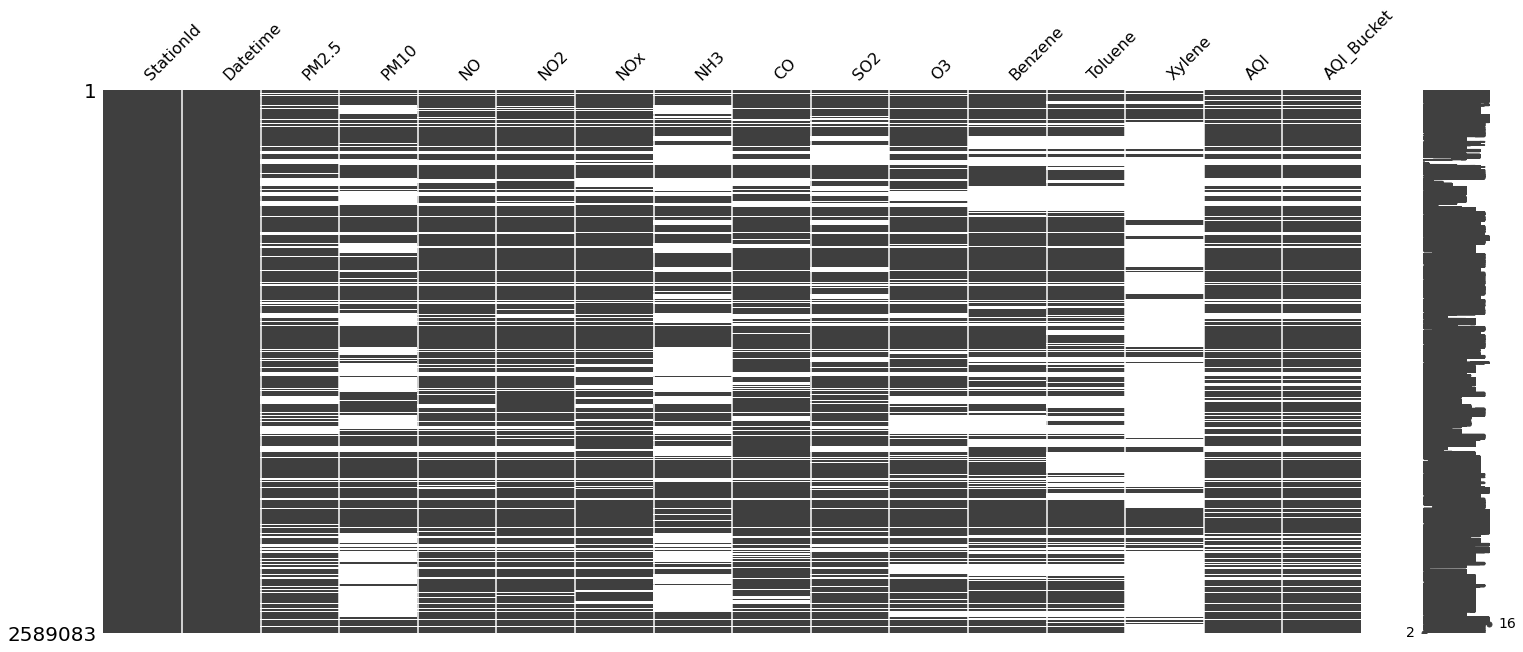

In [ ]:
msno.matrix(df) 

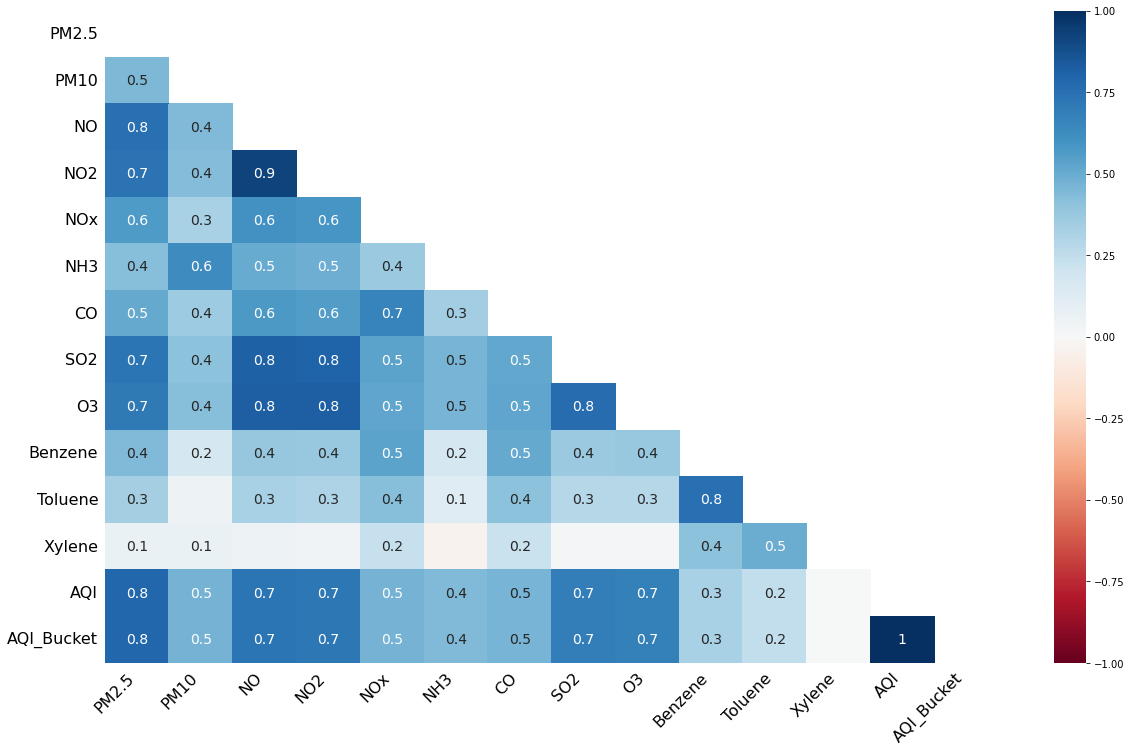

In [ ]:
msno.heatmap(df_c)

From the above observation of distribution of missing values there is significant common pattern between the data columns.
 We observe that NO and NO2 are strongly correlated. As this is reading of air polluting gases, it can also be the case where industrial pollutants emit certain type of gases and vehicle pollutants have different set of gases. Hence there is correlation with missing values. <br>
We apply forward imputation to the given dataset. Linear interpolation is an imputation technique that assumes a linear relationship between data points and utilises non-missing values from adjacent data points to compute a value for a missing data point.

Detailed guide for choice of imputation techniques can be found here <a href="https://www.kaggle.com/code/parulpandey/a-guide-to-handling-missing-values-in-python">here</a>. 

* Choose the columns to interpolate the missing data. 
* Apply bfill to initial values with 'Nan' as there isn't any value prior to them to interpolate. 

In [ ]:
cols = ['PM2.5','PM10','NO','NO2', 'NOx','NH3','CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'] 
df_imp = df[cols]
df_imp.interpolate(limit_direction='forward', inplace=True); 
df_imp.head(4)
df_1 = df[['StationId', 'Datetime']]                
df_2 = pd.concat([df_1, df_imp], axis=1, join='inner')
df_2['AQI'].fillna(method='bfill', inplace=True)                                                                                     

In [ ]:
df_2.isnull().sum() 

StationId     0
Datetime      0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

Extract the range of AQI_Bucket labels, ie, based on AQI (Air Quality Index) corresponding classes are assigned in AQI_bucket. Hence knowing the range of AQI is important to assign the corresponding classes to 'Nan' values in target label(AQI_Bucket).
Here we:
* Write conditions 
* Extract the upper limit of the range

In [ ]:
mod = df['AQI_Bucket'] == 1
sat = df['AQI_Bucket'] == 3
vp = df['AQI_Bucket'] == 5             
pr = df['AQI_Bucket'] == 2
gd = df['AQI_Bucket'] == 0                                                               
sr = df['AQI_Bucket'] == 4 

severe = np.max(df[sr]['AQI'])
very_poor = np.max(df[vp]['AQI'])
satisfactory = np.max(df[sat]['AQI'])
poor = np.max(df[pr]['AQI'])
moderate = np.max(df[mod]['AQI'])
good = np.max(df[gd]['AQI'])    

print('maximum values for:')
print("severe {}\nvery poor {}\npoor {}\nmoderate {}\ngood{}\nsatisfactory {} ".format(severe, very_poor, poor, moderate, good, satisfactory)) 

maximum values for:
severe 3133.0
very poor 400.0
poor 300.0
moderate 200.0
good50.0
satisfactory 100.0 


After knowing the range, we frame filters and assign the relevant class to the tuples. 

In [ ]:
sr_cond = df_2['AQI'] > 400
vp_cond = df_2['AQI'] <=400
pr_cond = df_2['AQI'] <= 300
md_cond = df_2['AQI'] <= 200
st_cond = df_2['AQI'] <= 100
gd_cond = df_2['AQI'] <= 50

df_2.loc[sr_cond, 'AQI_Bucket'] = 4
df_2.loc[vp_cond, 'AQI_Bucket'] = 5
df_2.loc[pr_cond, 'AQI_Bucket'] = 2
df_2.loc[md_cond, 'AQI_Bucket'] = 1
df_2.loc[st_cond, 'AQI_Bucket'] = 3
df_2.loc[gd_cond, 'AQI_Bucket'] = 0


Save the imputed data in csv format. 

In [ ]:
fp_i = '/content/drive/MyDrive/Projects/imp_station_hour.csv'
df_2.to_csv(fp_i, index = False)

### Preprocessing city data 
Similarly preprocess the city data

In [ ]:
cols = ['PM2.5','PM10','NO','NO2', 'NOx','NH3','CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'] 

df_c_imp = df_c[cols]
df_c_imp.interpolate(limit_direction='forward', inplace=True); 

df_c_1 = df_c[['City', 'Datetime']]
df_c_2 = pd.concat([df_c_1, df_c_imp], axis=1, join='inner')
df_c_2['AQI'].fillna(method='bfill', inplace=True)                           


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:10720: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
modc = df_c['AQI_Bucket'] == 1
satc = df_c['AQI_Bucket'] == 3
vpc = df_c['AQI_Bucket'] == 5             
prc = df_c['AQI_Bucket'] == 2
gdc = df_c['AQI_Bucket'] == 0                                                               
src = df_c['AQI_Bucket'] == 4 

severec = np.max(df_c[src]['AQI'])
very_poorc = np.max(df_c[vpc]['AQI'])
satisfactoryc = np.max(df_c[satc]['AQI'])
poorc = np.max(df_c[prc]['AQI'])
moderatec = np.max(df_c[modc]['AQI'])
goodc = np.max(df_c[gdc]['AQI'])    

print('maximum values for:')
print("severe {}\nvery poor {}\npoor {}\nmoderate {}\ngood{}\nsatisfactory {} ".format(severec, very_poorc, poorc, moderatec, goodc, satisfactoryc)) 

maximum values for:
severe 3133.0
very poor 400.0
poor 300.0
moderate 200.0
good50.0
satisfactory 100.0 


In [ ]:
sr_cond = df_c_2['AQI'] > 400
vp_cond = df_c_2['AQI'] <=400
pr_cond = df_c_2['AQI'] <= 300
md_cond = df_c_2['AQI'] <= 200
st_cond = df_c_2['AQI'] <= 100
gd_cond = df_c_2['AQI'] <= 50

df_c_2.loc[sr_cond, 'AQI_Bucket'] = 4
df_c_2.loc[vp_cond, 'AQI_Bucket'] = 5
df_c_2.loc[pr_cond, 'AQI_Bucket'] = 2
df_c_2.loc[md_cond, 'AQI_Bucket'] = 1
df_c_2.loc[st_cond, 'AQI_Bucket'] = 3
df_c_2.loc[gd_cond, 'AQI_Bucket'] = 0

In [ ]:
df_c_2.isnull().sum()

City              0
Datetime          0
PM2.5           665
PM10          38274
NO                0
NO2               0
NOx               0
NH3           48192
CO                0
SO2               0
O3                3
Benzene           0
Toluene           0
Xylene            0
AQI               0
AQI_Bucket        0
dtype: int64

In [ ]:
df_c_2['PM2.5'] = df_c_2['PM2.5'].fillna(0)
df_c_2['O3'] = df_c_2['O3'].fillna(0)
df_c_2['NH3'] = df_c_2['NH3'].fillna(0)
df_c_2['PM10'] = df_c_2['PM10'].fillna(0)
df_c_2.isnull().sum()

City          0
Datetime      0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [ ]:
df_c_2.head(3) 

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,0.0,0.0,1.00,40.009998,36.369999,0.0,1.00,122.070000,0.0,0.0,0.0,0.0,288.0,2
1,Ahmedabad,2015-01-01 02:00:00,0.0,0.0,0.02,27.750000,19.730000,0.0,0.02,85.900002,0.0,0.0,0.0,0.0,288.0,2
2,Ahmedabad,2015-01-01 03:00:00,0.0,0.0,0.08,19.320000,11.080000,0.0,0.08,52.830002,0.0,0.0,0.0,0.0,288.0,2


In [ ]:
fp_c = '/content/drive/MyDrive/Projects/imp_city_hour.csv'
df_c_2.to_csv(fp_c, index=False)                                        

## Load Preprocessed data

We are using city data for our anaysis and classification problem. 

In [ ]:
dtypes_1 = {
    'StationId':'category', 
    'Datetime' : 'category', 
    'PM2.5' : 'float32', 
    'PM10' : 'float32', 
    'NO' : 'float32', 
    'NO2' : 'float32', 
    'NOx' : 'float32', 
    'NH3' : 'float32',
    'CO' : 'float32', 
    'SO2' : 'float32', 
    'O3' : 'float32', 
    'Benzene' : 'float32', 
    'Toluene' : 'float32', 
    'Xylene' : 'float32', 
    'AQI' : 'float32', 
    'AQI_Bucket': 'int32'
}  

dtypes_2 = {
    'City':'category',
    'Datetime' : 'category', 
    'PM2.5' : 'float32', 
    'PM10' : 'float32', 
    'NO' : 'float32',          
    'NO2' : 'float32', 
    'NOx' : 'float32', 
    'NH3' : 'float32',
    'CO' : 'float32',          
    'SO2' : 'float32',      
    'O3' : 'float32', 
    'Benzene' : 'float32', 
    'Toluene' : 'float32',     
    'Xylene' : 'float32',   
    'AQI' : 'float32',          
    'AQI_Bucket': 'int32'
}                               

df_ch = pd.read_csv('/content/drive/MyDrive/Projects/imp_city_hour.csv', dtype = dtypes_2)
df_ch['Datetime'] = pd.to_datetime(df_ch['Datetime'])

## Exploratory Data Analysis

### Distribution of classes in the Data

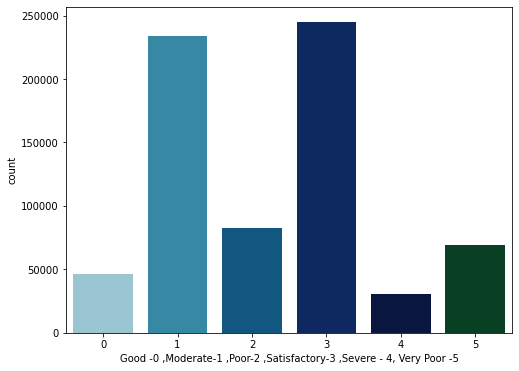

In [ ]:
def countplot(x_val):     
  plt.figure(figsize = (8, 6))          
  sns.countplot(x = x_val, palette = 'ocean_r');
  plt.xlabel("Good -0 ,Moderate-1 ,Poor-2 ,Satisfactory-3 ,Severe - 4, Very Poor -5")
countplot(df_ch['AQI_Bucket'])                                                           

### Cities vs AQI Indexes

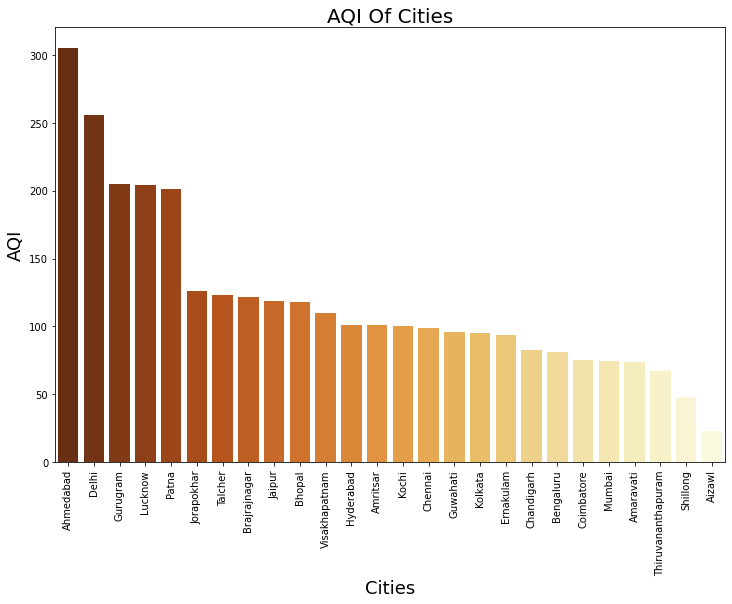

In [ ]:
"""Select city, AQI from df_ch ORDER BY AQI DESC"""
# do average of every city aqi value,                                                                                        
city_vs_AQI = df_ch[['City', 'AQI']].groupby(['City']).median().sort_values('AQI', ascending=False).reset_index()

def barplot(a,b, title, x_label, y_label, palet):
  plt.figure(figsize=(12,8))
  sns.barplot(x = a, y = b, palette =palet, order=a)
  plt.xticks(rotation = 90)
  plt.title(title, fontsize = 20)
  plt.xlabel(x_label, fontsize = 18)
  plt.ylabel(y_label, fontsize = 18)

barplot(city_vs_AQI['City'], city_vs_AQI['AQI'], "AQI Of Cities","Cities", "AQI","YlOrBr_r")

Ahmedabad has AQI in the range of 300 followed by Delhi. 300 indicates poor quality. 


### Gases and top 3 cities with maximum of that particular gas

Different cities are extracted which has maximum amount of gas type. Different gases have different cities in top 3. 

In [ ]:
cols = ['PM2.5','PM10','NO','NO2', 'NOx','NH3','CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'] 

# Analyze the states with highest particular gases 
dff = []
for i in cols: 
  data = df_ch[[i, 'City']].groupby(['City']).median().sort_values(i, ascending = False).iloc[0:3].reset_index()
  dff.append(data) 

for i in range(len(cols)):
  print(dff[i])
  print("--------------------------")           

         City      PM2.5
0       Patna  96.750000
1  Jorapokhar  94.879997
2       Delhi  86.839996
--------------------------
         City        PM10
0       Delhi  199.830002
1    Gurugram  128.202103
2  Jorapokhar  115.480003
--------------------------
      City         NO
0    Kochi  69.729996
1   Mumbai  37.826057
2  Talcher  20.980000
--------------------------
        City        NO2
0      Delhi  44.279999
1  Ahmedabad  32.479889
2    Kolkata  27.860001
--------------------------
         City        NOx
0       Kochi  66.160004
1  Jorapokhar  51.489998
2      Mumbai  44.734665
--------------------------
      City        NH3
0  Chennai  43.061951
1    Delhi  37.279999
2    Patna  35.077019
--------------------------
           City    CO
0     Ahmedabad  7.82
1       Talcher  1.84
2  Brajrajnagar  1.77
--------------------------
         City        SO2
0      Mumbai  35.750572
1  Jorapokhar  25.820000
2     Talcher  24.750000
--------------------------
     City         O3

### Correlation between the gases and AQI

(13.5, -0.5)

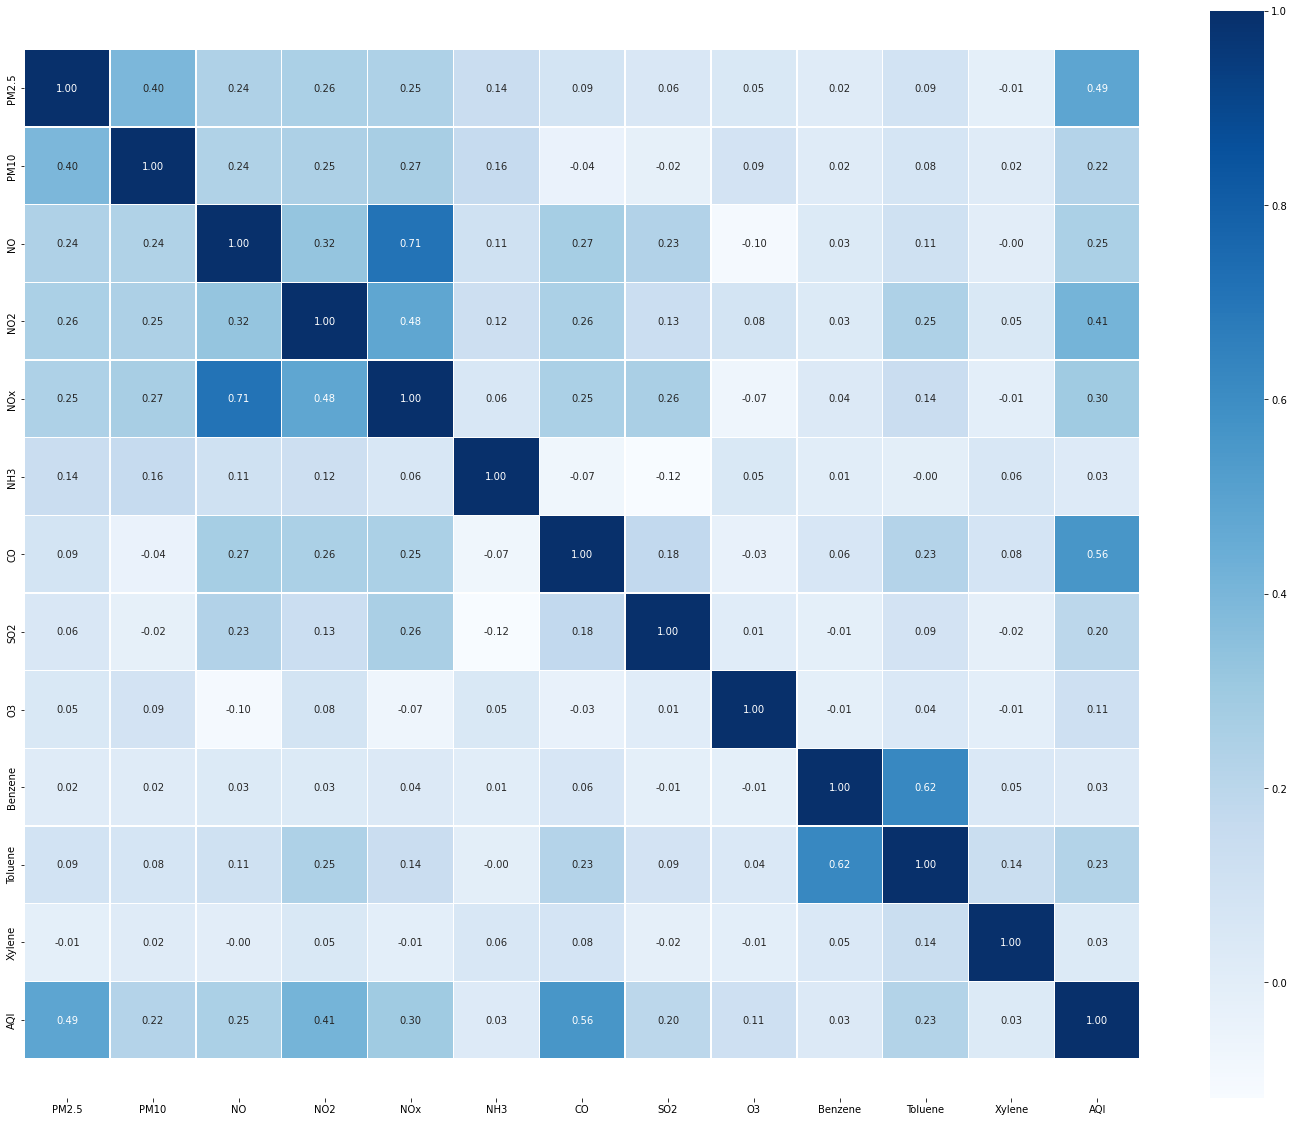

In [ ]:
heat_cols = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2',
             'O3','Benzene','Toluene','Xylene','AQI']

df_corr = df_ch[heat_cols]

corr_matrix =df_corr.corr()
fig, lax = plt.subplots(figsize =(25, 20))
ax = sns.heatmap(corr_matrix, 
                annot = True,
                cmap = 'Blues',
                linewidths = 0.5,
                fmt =".2f",
                ); 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)     

There is correlation between:
* benzene and toluene                  
* NOx, NO 
* CO and AQI 

Most of the columns are not corelated or have correlation in minimum, thus modelling can be done by considering all gases, and need not drop highly correlated columns, which might effect the model sensitivity. 

### Plot to find the pattern of correlation


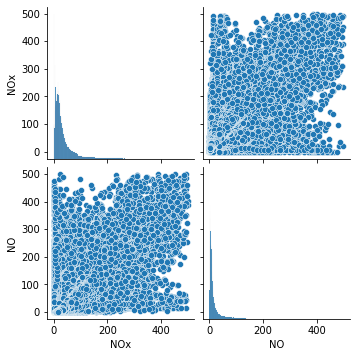

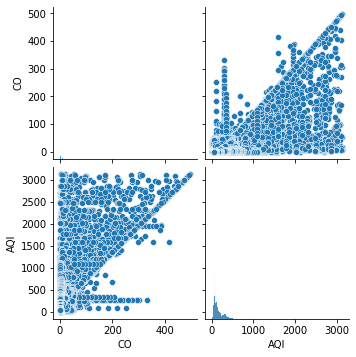

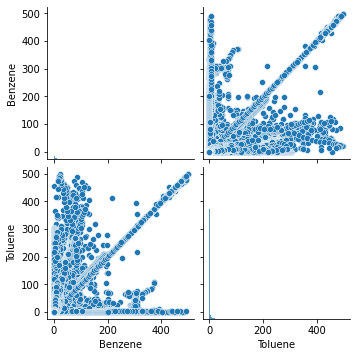

In [ ]:
cols = ['NOx', 'NO', 'Benzene', 'Toluene', 'CO', 'AQI']
col_1 = ['NOx', 'NO'] 
col_2 = ['CO', 'AQI'] 
col_3 = ['Benzene', 'Toluene'] 

def pairplot(a):
  sns.pairplot(a, height = 2.5)
  plt.show()                                
pairplot(df_ch[col_1])
pairplot(df_ch[col_2])
pairplot(df_ch[col_3])


* Benzene and Tolune is linear in nature. 
* NO and NO2 have common distribution. 

Convert datetime to year, month and day. 

In [ ]:
df_ch['year'] = pd.DatetimeIndex(df_ch.Datetime).year
df_ch['month'] = pd.DatetimeIndex(df_ch.Datetime).month
df_ch['day'] = pd.DatetimeIndex(df_ch.Datetime).day 

In [ ]:
df_ch.isnull().sum()

City          0
Datetime      0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
year          0
month         0
day           0
dtype: int64

### Datetime Vs AQI

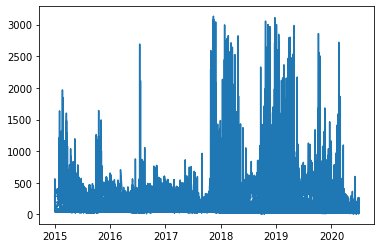

In [ ]:
plt.plot(df_ch['Datetime'], df_ch['AQI'])

We observe that AQI is rising to severe in year 2018-2019 and slightly reduced in 2020 due to lockdown. 

### Analysing Pollution in Delhi

Select data values corresponding to city= Delhi. Scatterplot is used for representation. 


In [ ]:
dli = df_ch[df_ch.City == 'Delhi'].reset_index() 

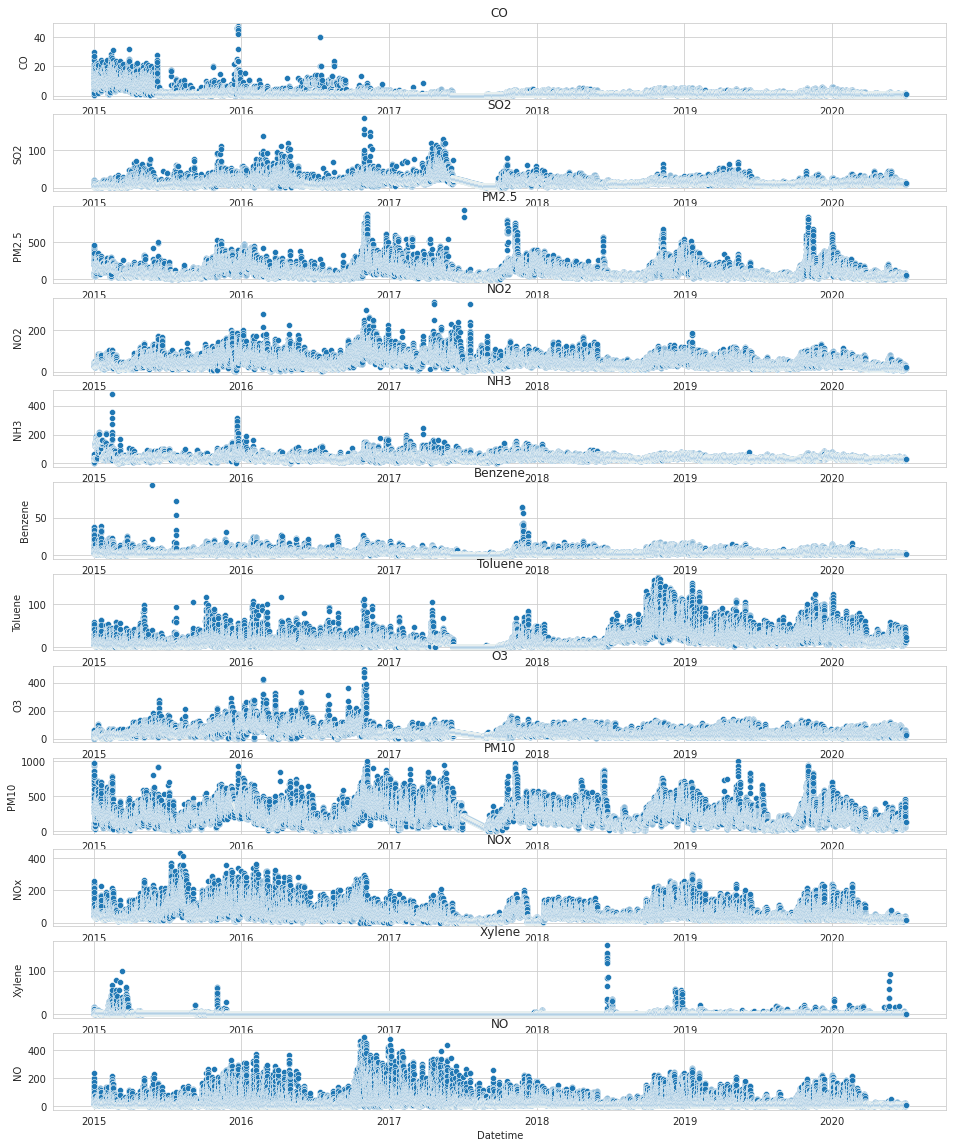

In [ ]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows = 12,
                         ncols = 1,
                         figsize = (16,20)) 
axes[0].set_title('CO')
sns.scatterplot(x=dli['Datetime'], y =dli['CO'],data = df_ch,ax = axes[0], alpha = 1 )
axes[1].set_title('SO2')
sns.scatterplot(x=dli['Datetime'], y =dli['SO2'],data = df_ch, ax = axes[1], alpha = 1)

axes[2].set_title('PM2.5')
sns.scatterplot(x=dli['Datetime'], y =dli['PM2.5'],data = df_ch,ax = axes[2], alpha = 1 )
axes[3].set_title('NO2')
sns.scatterplot(x=dli['Datetime'], y =dli['NO2'],data = df_ch, ax = axes[3], alpha = 1)

axes[4].set_title('NH3')
sns.scatterplot(x=dli['Datetime'], y =dli['NH3'],data = df_ch,ax = axes[4], alpha = 1 )
axes[5].set_title('Benzene')
sns.scatterplot(x=dli['Datetime'], y =dli['Benzene'],data = df_ch, ax = axes[5], alpha = 1)

axes[6].set_title('Toluene')
sns.scatterplot(x=dli['Datetime'], y =dli['Toluene'],data = df_ch,ax = axes[6], alpha = 1 )
axes[7].set_title('O3')
sns.scatterplot(x=dli['Datetime'], y =dli['O3'],data = df_ch, ax = axes[7], alpha = 1)

axes[8].set_title('PM10')
sns.scatterplot(x=dli['Datetime'], y =dli['PM10'],data = df_ch,ax = axes[8], alpha = 1 )
axes[9].set_title('NOx')
sns.scatterplot(x=dli['Datetime'], y =dli['NOx'],data = df_ch, ax = axes[9], alpha = 1)

axes[10].set_title('Xylene')
sns.scatterplot(x=dli['Datetime'], y =dli['Xylene'],data = df_ch,ax = axes[10], alpha = 1 )
axes[11].set_title('NO')
sns.scatterplot(x=dli['Datetime'], y =dli['NO'],data = df_ch, ax = axes[11], alpha = 1)



We observe different pattern of density of gases from 2015 to 2020.  
* There is rise of toluene
* Particulate matters, NOx NO2, have similar distributions. 

## Boxplot of Gases

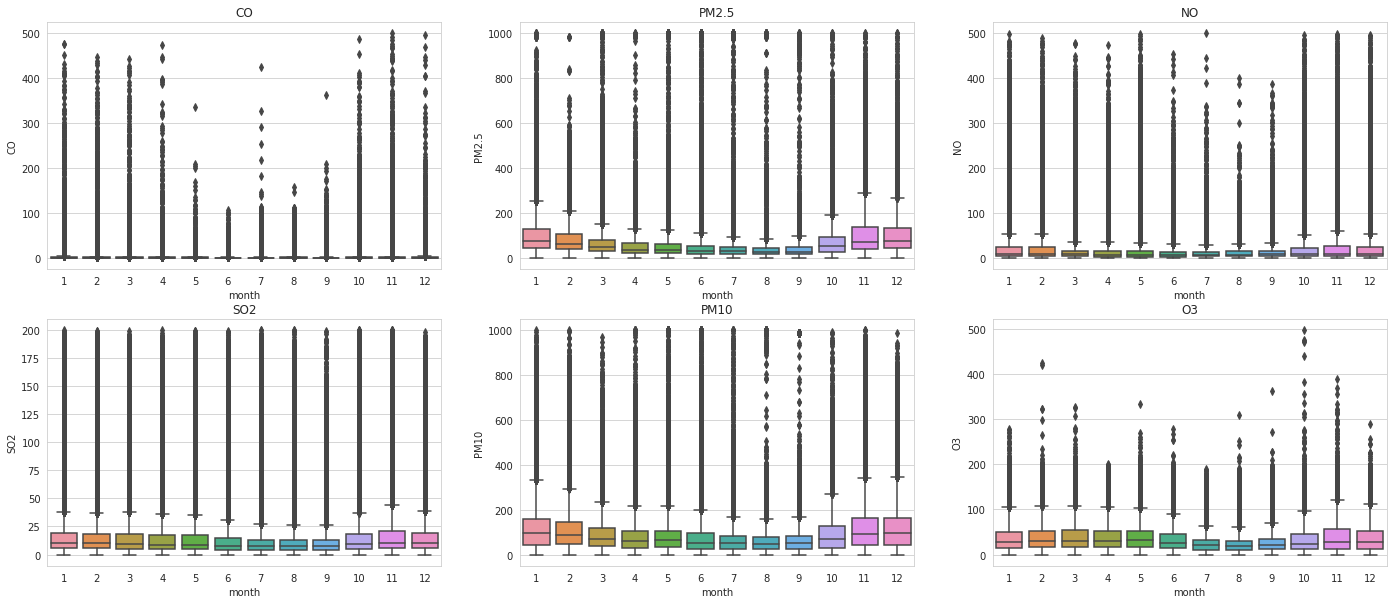

In [ ]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows = 2,
                         ncols = 3,
                         figsize = (24,10)) 
axes[0][0].set_title('CO')
sns.boxplot(x=df_ch['month'], y = df_ch['CO'], ax = axes[0][0])

axes[0][1].set_title('PM2.5')
sns.boxplot(x=df_ch['month'], y = df_ch['PM2.5'], ax = axes[0][1])

axes[0][2].set_title('NO')
sns.boxplot(x=df_ch['month'], y = df_ch['NO'], ax = axes[0][2])

axes[1][0].set_title('SO2')                                           
sns.boxplot(x=df_ch['month'], y = df_ch['SO2'], ax = axes[1][0]) 

axes[1][1].set_title('PM10')                                           
sns.boxplot(x=df_ch['month'], y = df_ch['PM10'], ax = axes[1][1])

axes[1][2].set_title('O3')                                           
sns.boxplot(x=df_ch['month'], y = df_ch['O3'], ax = axes[1][2])

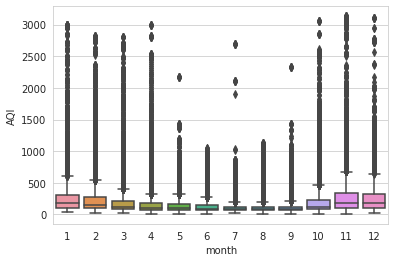

In [ ]:
sns.boxplot(x=df_ch['month'], y = df_ch['AQI'])

## Variable Transformation

We observe that data is largely skewed and does not have normal distribution. 
After some exploration of feature engineering techniques
<a href = "https://www.kaggle.com/code/prashant111/a-reference-guide-to-feature-engineering-methods/notebook">here</a> and methods to deal with <a href = 
"https://rcompanion.org/handbook/I_12.html#:~:text=For%20right%2Dskewed%20data%E2%80%94tail,log%20(constant%20%E2%80%93%20x)">skewed data</a> certain variable transformations are employed.   

Let's diagnose the skewness by plotting histograms. Consider PM2.5 and CO fot the analysis representing more or less 2 types of distributions. 

PM2.5


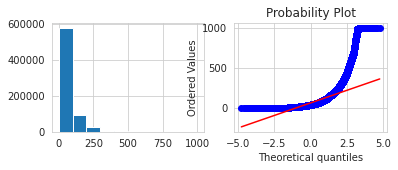

PM2.5_log


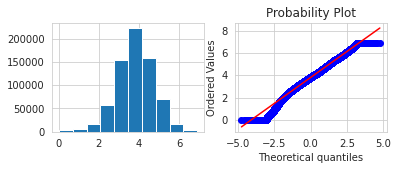

PM2.5_reci


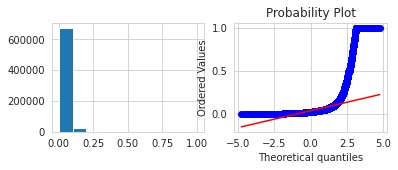

PM2.5_sq_r


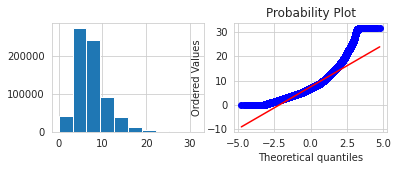

PM2.5_exp


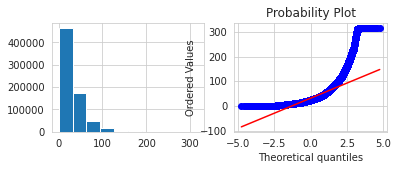

PM2.5_boxcox


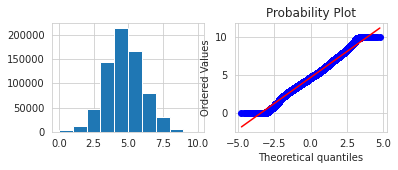

CO


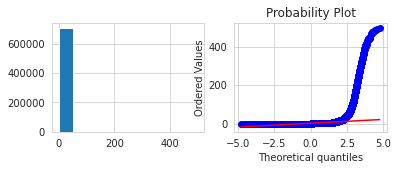

CO_log


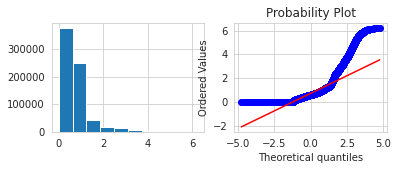

CO_exp


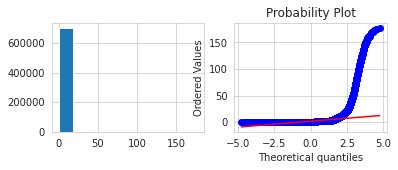

CO_sq_r


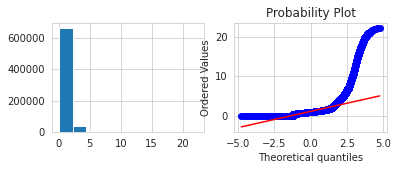

CO_boxcox


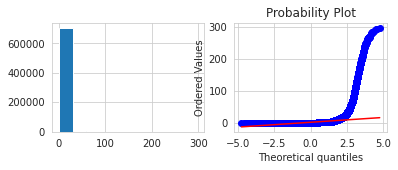

In [ ]:
def diagnostic_plots(df, variable):
  plt.figure(figsize = (6,2))
  plt.subplot(1,2,1)
  print(variable)
  df[variable].hist()

  plt.subplot(1,2,2)
  stats.probplot(df[variable], dist = 'norm', plot = pylab)
  plt.show()

diagnostic_plots(df_ch, 'PM2.5')
data = df_ch.copy(deep = True) 
d_exp = df_ch['PM2.5'].to_frame()
d_exp['PM2.5_log'] = np.log(d_exp['PM2.5'] + 1)
diagnostic_plots(d_exp, 'PM2.5_log') 
d_exp['PM2.5_reci']  = (1/(d_exp['PM2.5']+1) )
diagnostic_plots(d_exp, 'PM2.5_reci') 
d_exp['PM2.5_sq_r'] = d_exp['PM2.5'] ** (1/2)
diagnostic_plots(d_exp, 'PM2.5_sq_r')  
d_exp['PM2.5_exp'] = d_exp['PM2.5'] ** (1/1.2)
diagnostic_plots(d_exp, 'PM2.5_exp')
d_exp['PM2.5_boxcox'] = boxcox1p(d_exp['PM2.5'], 0.1)
# print('Optimal lambda:', param)
diagnostic_plots(d_exp, 'PM2.5_boxcox') 
d_exp2 = df_ch['CO'].to_frame()
diagnostic_plots(d_exp2, 'CO')
d_exp2['CO_log'] = np.log(d_exp2['CO']+1)
diagnostic_plots(d_exp2, 'CO_log')
d_exp2['CO_exp'] = d_exp2['CO'] ** (1/1.2)
diagnostic_plots(d_exp2, 'CO_exp') 
d_exp2['CO_sq_r'] = d_exp2['CO'] ** (1/2) 
diagnostic_plots(d_exp2, 'CO_sq_r') 
d_exp2['CO_boxcox'] = boxcox1p(d_exp2['CO'], 0.9)
# print('Optimal lambda:', param)            
diagnostic_plots(d_exp2, 'CO_boxcox')                   

We observe that boxcox and log transformations transform the data normally, rest failed to do so. CO failed to normalize as there is lot of skewed distributions. 
Exploration by the previous resources suggest the following:
* For right-skewed data—tail is on the right, positive skew—, common transformations include square root, cube root, and log.
* For left-skewed data—tail is on the left, negative skew—, common transformations include square root (constant – x), cube root (constant – x), and log (constant – x).


### Choose the columns for applying transformations. 
steps: 
* Plot to know the skewness of variables
* Based on skeweness apply transformations

In [ ]:
heat_cols = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2',
             'O3','Benzene','Toluene','Xylene','AQI']                

--------------- PM2.5 ------------------


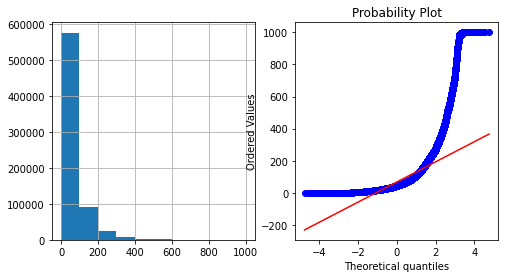

--------------- PM10 ------------------


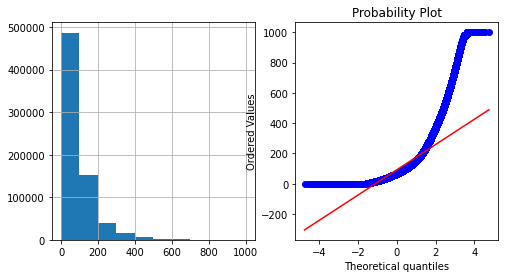

--------------- NO ------------------


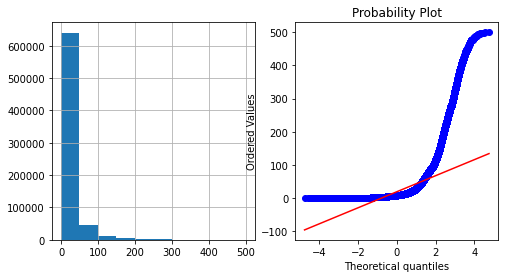

--------------- NO2 ------------------


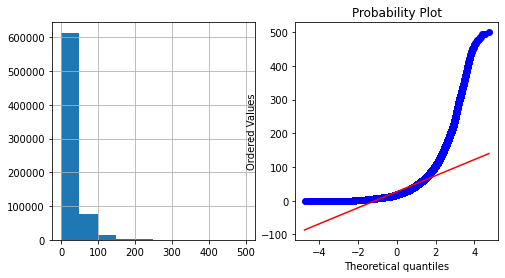

--------------- NOx ------------------


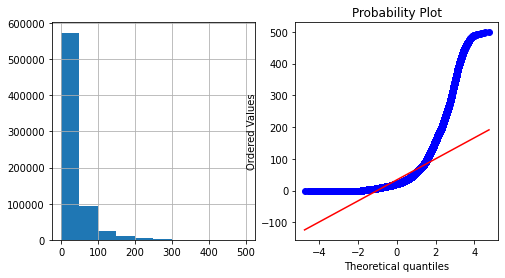

--------------- NH3 ------------------


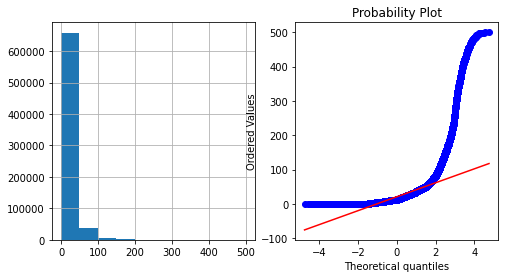

--------------- CO ------------------


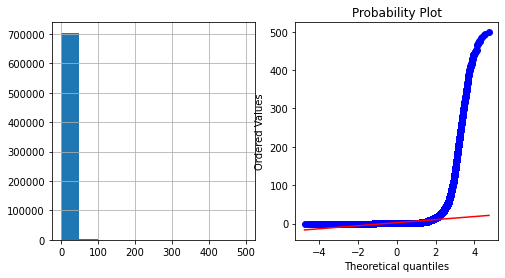

--------------- SO2 ------------------


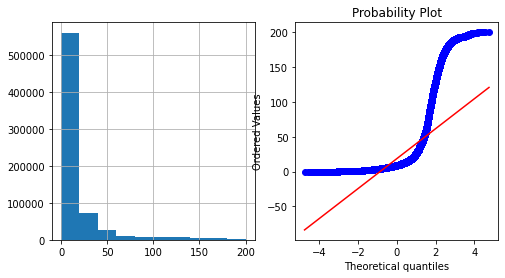

--------------- O3 ------------------


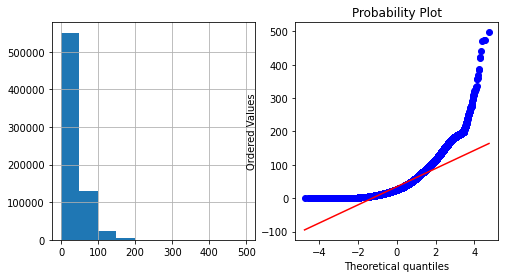

--------------- Benzene ------------------


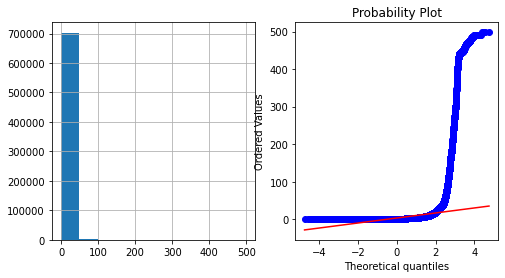

--------------- Toluene ------------------


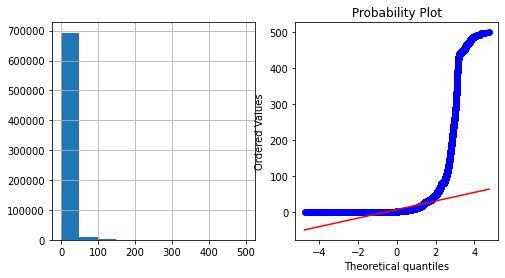

--------------- Xylene ------------------


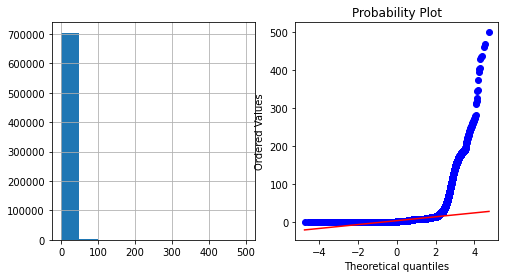

--------------- AQI ------------------


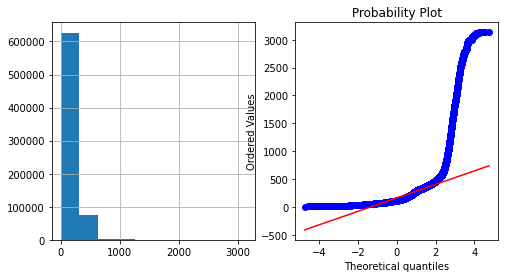

In [ ]:
def diagnostic_plots(df, variable):
  plt.figure(figsize = (8,4))
  plt.subplot(1,2,1)
  df[variable].hist()
  plt.subplot(1,2,2)
  stats.probplot(df[variable], dist = 'norm', plot = pylab)
  plt.show() 
for i in heat_cols:
  print('---------------', i, '------------------')
  diagnostic_plots(df_ch, i)

Eight columns are chosen which can be normalized based on the probability plot.                  
The plot of log vs boxcox is plotted to choose the right transformation for the given variable. 

In [ ]:
def diagnostic_plots(df, variable):
  plt.figure(figsize = (10,4))
  print(variable)
  plt.subplot(1,2,1)             
  df[variable].hist()

  plt.subplot(1,2,2)
  stats.probplot(df[variable], dist = 'norm', plot = pylab)
  plt.show()                                                           

In [ ]:
df_cc = df_ch.copy(deep=True)   

In [ ]:
skew_cols = ['PM2.5', 'PM10', 'NO2','SO2', 'O3', 'NH3', 'NO', 'NOx']
df_boxcox = df_cc[skew_cols]
df_logs = df_cc[skew_cols]                                           
                                       

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



--------------- PM2.5 ------------------
PM2.5 boxcox
PM2.5


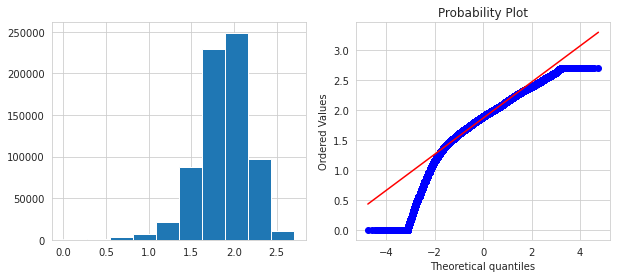

PM2.5 log
PM2.5


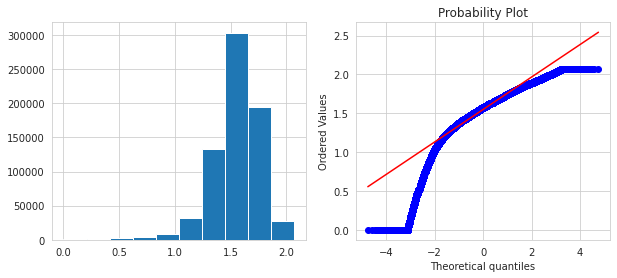

--------------- PM10 ------------------
PM10 boxcox
PM10


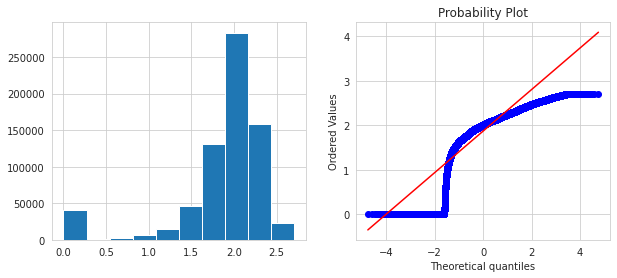

PM10 log
PM10


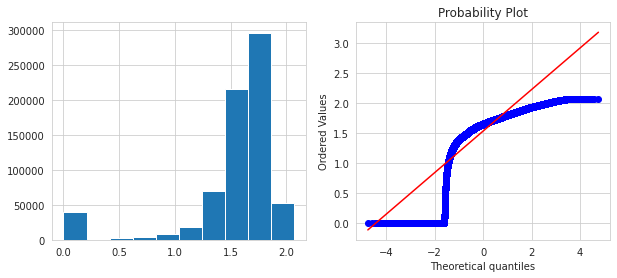

--------------- NO2 ------------------
NO2 boxcox
NO2


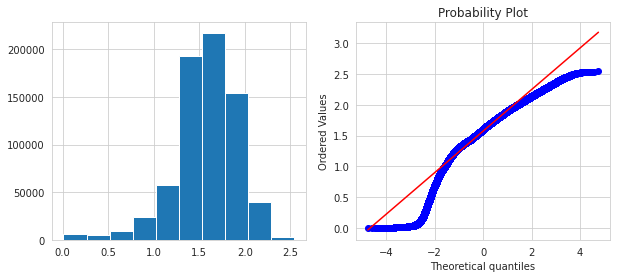

NO2 log
NO2


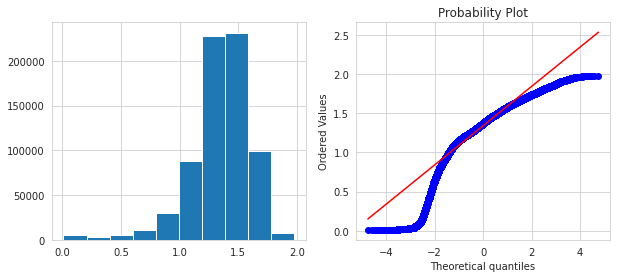

--------------- SO2 ------------------
SO2 boxcox
SO2


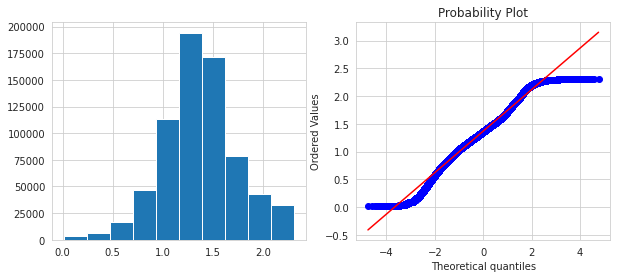

SO2 log
SO2


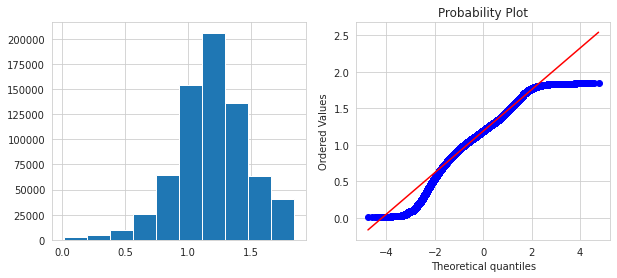

--------------- O3 ------------------
O3 boxcox
O3


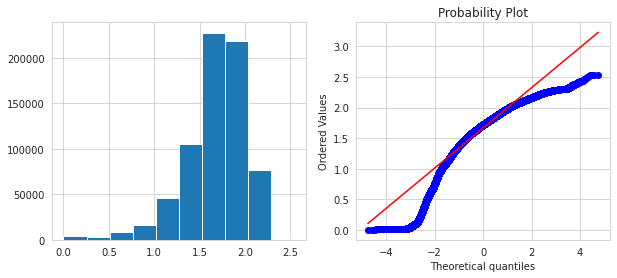

O3 log
O3


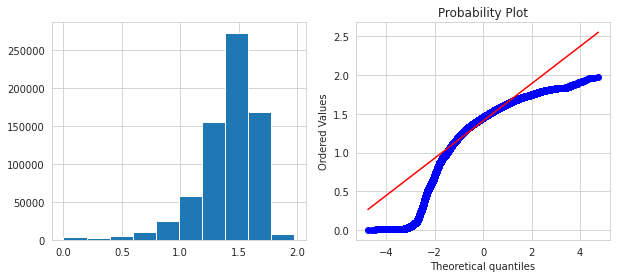

--------------- NH3 ------------------
NH3 boxcox
NH3


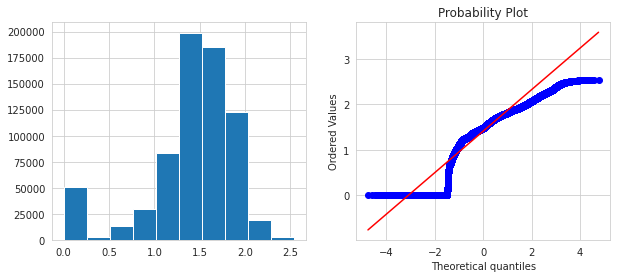

NH3 log
NH3


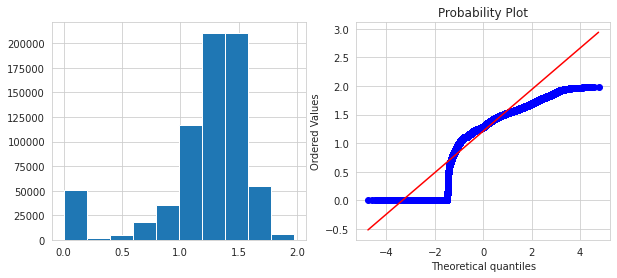

--------------- NO ------------------
NO boxcox
NO


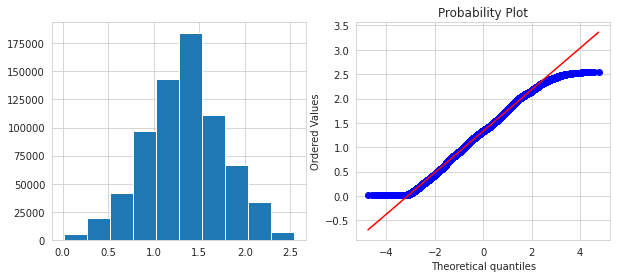

NO log
NO


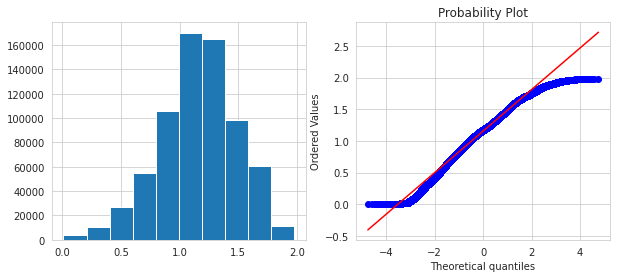

--------------- NOx ------------------
NOx boxcox
NOx


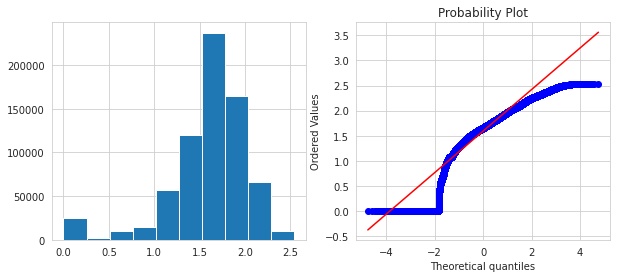

NOx log
NOx


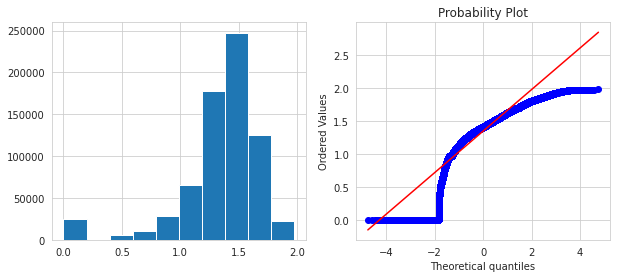

In [ ]:
# Apply variable transformation
for i in skew_cols:
  df_boxcox.loc[:,i] = boxcox1p(df_boxcox[i], 0.1)
  df_logs.loc[:,i] = np.log(df_logs[i] + 1)

for i in skew_cols:
  print('---------------', i, '------------------')
  print(i, 'boxcox')
  diagnostic_plots(df_boxcox, i)    
  print(i, 'log')
  diagnostic_plots(df_logs, i)            

'NO' has been normalized better with log transformation, rest of the coluns has performed well with boxcox.  

Thus corresponding transformed data is concatenated. 
Independent variables are assigned to predictors and 'AQI_Bucket' to target. 

<br>
'AQI' is removed as we are training the model to find its own criteria to classify the classes based on data values, rather relying on formula based 'AQI'. 'AQI' is used as target variable for our regression model which predicts the 'AQI' which is discussed in the next half of the experiment. <br>

Save the transformed data if needed for direct execution. 

In [ ]:
df_col = ['CO', 'Benzene', 'Toluene', 'Xylene']                                        
predictors = pd.concat([df_ch[df_col], df_boxcox[['PM2.5', 'PM10', 'NO2', 'SO2', 'O3', 'NH3', 'NOx']],df_logs['NO']], axis=1, join='inner')  
target = df_ch['AQI_Bucket']            

In [ ]:
fp_p = '/content/drive/MyDrive/Projects/predictors.csv'
predictors.to_csv(fp_p, index=False)

Split the data into train and test with 80% - 20% ratio

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.20, random_state = 10) 

After referring and researching about the importance of scaling 
<a href = "https://medium.com/analytics-vidhya/why-scaling-is-important-in-machine-learning-aee5781d161a">link</a> minmaxscaler  and standard scaler is experimented. 
* MinMaxScaler preserves the shape of the original distribution. It doesn’t meaningfully change the information embedded in the original data.
* It doesn’t reduce the importance of outliers. As our data has lot of outliers minmaxscaler is chosen for experimentation. 
* StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. It is suitable for normalized distributions. 

After experimentations, standard scaler is chosen as the scaling type. 

In [ ]:
# ----------------------------experimentation with minmaxscaler--------------------------------------------------

In [ ]:
sc = preprocessing.MinMaxScaler()
x_train = sc.fit_transform(x_train) 
x_test = sc.transform(x_test) 

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)    
x_test = sc.transform(x_test)

## Modelling 

Dictionary of different models is created inorder to choose the good performing classification model to this dataset. 
Model and corresponding score is updated in the list of dictionaries. 

In [ ]:

model_dict = {
    'logistic_regression':{
        'model':LogisticRegression()
    },                                              
    'decision_tree':{
        'model': DecisionTreeClassifier()
    },                                             
    'naive_bayes_guassian':{
        'model':GaussianNB()
    },

    'naive_bayes_bernouli':{
        'model':BernoulliNB(binarize=.1)
    },
    'knn':{
    'model':KNeighborsClassifier(),
       },
    'randomforest_classifier':{
        'model': RandomForestClassifier()
    },
    'xgb_classifier':{
        'model':XGBClassifier()
    },
    'svm':{
    'model': SVC()
    }
}

scores = []
for mn, mf in model_dict.items():
  clf = mf['model']
  clf.fit(x_train[:40000], y_train[:40000])         
  ans =  clf.score(x_test[:40000], y_test[:40000])
  scores.append({
      'model': mn,
      'score': ans
  }) 

In [ ]:
scores

[{'model': 'logistic_regression', 'score': 0.546425},
 {'model': 'decision_tree', 'score': 0.62155},
 {'model': 'naive_bayes_guassian', 'score': 0.5001},
 {'model': 'naive_bayes_bernouli', 'score': 0.3593},
 {'model': 'knn', 'score': 0.660675},
 {'model': 'randomforest_classifier', 'score': 0.7332},
 {'model': 'xgb_classifier', 'score': 0.65475},
 {'model': 'svm', 'score': 0.61215},
 [{'model': 'logistic_regression', 'score': 0.57105},
  {'model': 'decision_tree', 'score': 0.6217},
  {'model': 'naive_bayes_guassian', 'score': 0.5001},
  {'model': 'naive_bayes_bernouli', 'score': 0.499025},
  {'model': 'knn', 'score': 0.6713},
  {'model': 'randomforest_classifier', 'score': 0.7352},
  {'model': 'xgb_classifier', 'score': 0.65475},
  {'model': 'svm', 'score': 0.647475}]]

KNN and RandomForest are the highest performing models. 

For efficient choice of model, imbalance is removed. Only small chunk of data is utilized for the experiment for saving time. 

In [ ]:
Counter(y_train[:40000])

Counter({0: 2586, 1: 13112, 2: 4661, 3: 13861, 4: 1782, 5: 3998})

In [ ]:
# knn , random forest  
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x4_train,y4_train = oversample.fit_resample(x_train[:40000],y_train[:40000])
print('Classes and number of values in trainset after SMOTE:',Counter(y4_train))

Classes and number of values in trainset after SMOTE: Counter({3: 13861, 1: 13861, 2: 13861, 0: 13861, 4: 13861, 5: 13861})


In [ ]:
# Choice between randomforest and KNN. 
scores_s = []
def knn_randomforest():
  models = [KNeighborsClassifier(), RandomForestClassifier() ]
  for i in models:
    clf_s = i
    clf_s.fit(x4_train, y4_train)
    ans = clf_s.score(x_test[:40000], y_test[:40000]) 
    scores_s.append({
        'model' : i,
        'score' : ans
    }
    )
knn_randomforest() 

In [ ]:
scores_s

[{'model': KNeighborsClassifier(), 'score': 0.626525},
 {'model': RandomForestClassifier(), 'score': 0.726625}]

### Here we are experimenting with 2 choices:
* Create hybrid model of low performing models.
* Using RandomForest Classifier 

## Hyper Parameter Tuning
Parameter search is done using 'RandomisedSearchCV' which search for parameters in random fasion. <br>
The function is run multiple times to get the high performance yielding parameters. 

In [ ]:
knn_grid = {
    'n_neighbors':list(range(2,10)),
    'leaf_size':list(range(1,50)),
    'weights':['uniform', 'distance'], 
    'algorithm':['auto', 'brute'],
    'n_jobs':[-1]
} 

dt_grid = {
            'criterion':['gini', 'entropy'],
            'max_depth':[11, 12, 14],
          "min_samples_split":np.arange(2,40, 2),
          "min_samples_leaf":np.arange(1, 20, 2),
           "max_features": ['auto', 'sqrt', 'log2']
} 

rf_grid = {
    'criterion':['gini', 'entropy'],
    'max_depth': [4,8,12, 14],
    'min_samples_split':np.arange(2,40, 2),
    'min_samples_leaf':np.arange(2, 20, 2),
    'max_features' :['sqrt', 'log2'],
    'max_samples':[0.2, 0.4,0.8]

} 

# Setup random.seed(42)
np.random.seed(42)

def random_search(classifier, grid, xtrain,ytrain, xtest, ytest):
  rs_model = RandomizedSearchCV(classifier, 
                           param_distributions=grid,
                           cv = 5,
                           n_iter= 20,
                           verbose =True)
  
  rs_model.fit(xtrain, ytrain) 
  scr = rs_model.score(xtest, ytest)
  scores.append({
      'model' : classifier,
      'score' : scr,
      'best_parameters': rs_model.best_params_
  })

x4_test = x_test[:4000]
y4_test = y_test[:4000] 
scores = []  
random_search(KNeighborsClassifier(),knn_grid, x4_train, y4_train, x4_test, y4_test)
random_search(DecisionTreeClassifier(),dt_grid, x4_train, y4_train, x4_test, y4_test)
random_search(DecisionTreeClassifier(),dt_grid, x4_train, y4_train, x4_test, y4_test)
random_search(DecisionTreeClassifier(),dt_grid, x4_train, y4_train, x4_test, y4_test)
random_search(RandomForestClassifier(),rf_grid, x4_train, y4_train, x4_test, y4_test) 
random_search(RandomForestClassifier(),rf_grid, x4_train, y4_train, x4_test, y4_test)
scores

[{'best_parameters': {'algorithm': 'brute',
   'leaf_size': 48,
   'n_jobs': -1,
   'n_neighbors': 2,
   'weights': 'distance'},
  'model': KNeighborsClassifier(),
  'score': 0.65325},
 {'best_parameters': {'criterion': 'entropy',
   'max_depth': 14,
   'max_features': 'log2',
   'min_samples_leaf': 7,
   'min_samples_split': 16},
  'model': DecisionTreeClassifier(),
  'score': 0.58175},
 {'best_parameters': {'criterion': 'entropy',
   'max_depth': 14,
   'max_features': 'log2',
   'min_samples_leaf': 1,
   'min_samples_split': 10},
  'model': DecisionTreeClassifier(),
  'score': 0.58575},
 {'best_parameters': {'criterion': 'entropy',
   'max_depth': 14,
   'max_features': 'sqrt',
   'min_samples_leaf': 1,
   'min_samples_split': 4},
  'model': DecisionTreeClassifier(),
  'score': 0.58125},
 {'best_parameters': {'criterion': 'gini',
   'max_depth': 14,
   'max_features': 'log2',
   'max_samples': 0.8,
   'min_samples_leaf': 4,
   'min_samples_split': 4},
  'model': RandomForestClassifi

In [ ]:
 # KNN hybrid Model
from sklearn.ensemble import VotingClassifier 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import model_selection
estimators = []
knn1 = KNeighborsClassifier()
knn3 = KNeighborsClassifier(weights = 'distance', n_neighbors = 2, n_jobs = -1, leaf_size = 48, algorithm ='brute') 
dt1 = DecisionTreeClassifier(criterion= 'entropy',
  max_depth = 14,
  max_features='log2',
  min_samples_leaf=1,
  min_samples_split=10,
)


estimators.extend([('knn1', knn1), ('knn3', knn3), ('dt1', dt1)]) 
ensemble = VotingClassifier(estimators, voting = 'hard')
ensemble.fit(x4_train, y4_train) 
score_hybrid = ensemble.score(x4_test, y4_test)  
score_hybrid 


0.661

Hybrid Model does not yield the quality result. Thus we proceed with the parameter search for Randomforest classifer for increasing the performance. 

In [ ]:

# exp_grid = {
#         'criterion':['gini'],
#         'n_estimators':[5,10,50,100,250],
#         'max_depth':[2,4,8,16,32,None],
#         'max_features':['sqrt']
        

#   } 
exp_grid = {
        'criterion':['gini'],
        'n_estimators':[100,250,300, 350, 400],
        'max_depth':[2,4,8,16,32,48, 64, None],
        'max_features':['sqrt']
        

  } 

def random_forest_search(classifier, grid, xtrain, ytrain, xtest, ytest):
  rs_model = RandomizedSearchCV(classifier, 
                            param_distributions=grid,
                            n_iter= 20,
                            verbose =True) 
  rs_model.fit(xtrain, ytrain)
  scr = rs_model.score(xtest, ytest)
  rf_scores.append({
      'parameters': rs_model.best_params_ , 
      'score': scr
  })
  

rf_scores = []  
random_forest_search(RandomForestClassifier(), exp_grid, x4_train, y4_train, x4_test, y4_test)

In [ ]:
random_forest_search(RandomForestClassifier(), exp_grid, x4_train, y4_train, x4_test, y4_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
rf_scores

[{'parameters': {'criterion': 'gini',
   'max_depth': 20,
   'max_features': 'log2',
   'max_samples': 0.6,
   'min_samples_leaf': 4,
   'min_samples_split': 2},
  'score': 0.703},
 {'parameters': {'criterion': 'gini',
   'max_depth': 30,
   'max_features': 'sqrt',
   'max_samples': 0.8,
   'min_samples_leaf': 4,
   'min_samples_split': 8},
  'score': 0.71125},
 {'parameters': {'criterion': 'gini',
   'max_depth': 20,
   'max_features': 'log2',
   'max_samples': 0.8,
   'min_samples_leaf': 2,
   'min_samples_split': 14},
  'score': 0.7045},
 {'parameters': {'criterion': 'gini',
   'max_depth': 32,
   'max_features': 'sqrt',
   'n_estimators': 250},
  'score': 0.72375},
 {'parameters': {'criterion': 'gini',
   'max_depth': 48,
   'max_features': 'sqrt',
   'n_estimators': 300},
  'score': 0.72775}]

'parameters': {'criterion': 'gini',
   'max_depth': 48,
   'max_features': 'sqrt',
   'n_estimators': 300},
  'score': 0.72775}   has out performed. 

Applying best result of randomforest on the entire model. 

In [ ]:
clf = RandomForestClassifier(criterion = 'gini',
                              max_depth = 48,
                              max_features = 'sqrt',
                              n_estimators = 300)
                             

clf.fit(x_train, y_train) 

RandomForestClassifier(max_depth=48, max_features='sqrt', n_estimators=300)

In [ ]:
## Saving the Model
import joblib
f_name = '/content/drive/MyDrive/Projects/rfj_model.sav'
joblib.dump(clf, f_name)

In [ ]:
score = clf.score(x_test,y_test)
y_preds = clf.predict(x_test)
score, y_preds

(0.8389546176938019, array([3, 1, 1, ..., 1, 5, 0], dtype=int32))

The model has accuracy of 84%

## Evaluating the Result

### Confusion Matrix. 

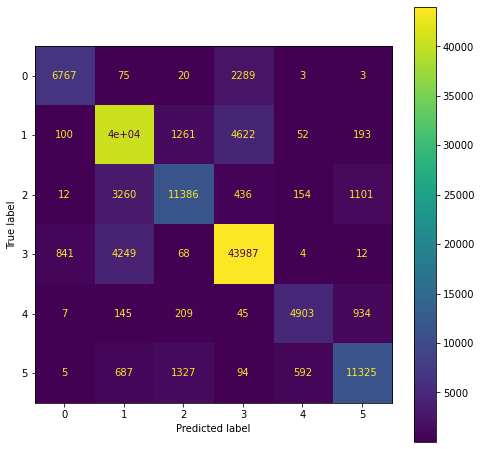

In [ ]:
fig, ax = plt.subplots(figsize = (8,8))
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true = y_test,
                                        y_pred = y_preds, ax=ax);

In [ ]:
plt.savefig("/content/drive/MyDrive/Projects/cm.png");

<Figure size 432x288 with 0 Axes>

In [ ]:
c_r = (classification_report(y_test, y_preds, digits=4))
print(c_r)

              precision    recall  f1-score   support

           0     0.8752    0.7390    0.8013      9157
           1     0.8276    0.8665    0.8466     46635
           2     0.7978    0.6964    0.7437     16349
           3     0.8546    0.8948    0.8742     49161
           4     0.8590    0.7854    0.8205      6243
           5     0.8347    0.8072    0.8207     14030

    accuracy                         0.8390    141575
   macro avg     0.8415    0.7982    0.8178    141575
weighted avg     0.8387    0.8390    0.8377    141575



Scope for Improvisation:
* Steps can be taken to improvise the recall rate as it's important to recoginise polluted areas rather than having more precision in this particular problem. 

### ROC Curve

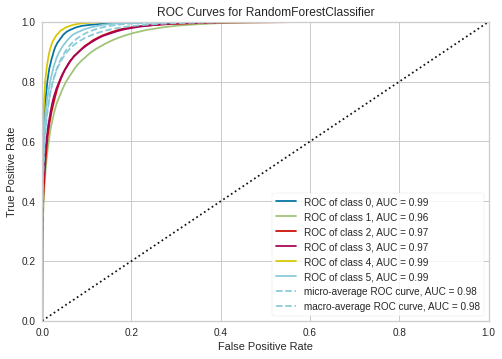

In [ ]:
# Multi class ROC Curve
from yellowbrick.classifier import ROCAUC
visualizer  = ROCAUC(clf, classes = [0,1,2,3,4,5])
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show() 

Classes: Good -0 ,Moderate-1 ,Poor-2 ,Satisfactory-3 ,Severe - 4, Very Poor -5
* Classes severe and very poor are recognised well. 
* There is problem in assigning classes to satisfactory, moderate and poor classes which fall under mid spectrum of the classes. 


## Inference and Conclusion
* Data preprocessing, exploration, variable transformation, scaling, modelling, hyper parameter tuning and finally model is chosen. 
* Different techniques are experimented. 

## Reference and Future Work

References apart from courses and  the links included in explanation:<br>

https://www.kaggle.com/code/rohanrao/calculating-aqi-air-quality-index-tutorial?scriptVersionId=41199538 <br>
https://www.kaggle.com/code/ankanhore545/airqualityindex-india-2015-2020 <br>
https://www.kaggle.com/code/parulpandey/a-guide-to-handling-missing-values-in-python <br>
https://www.easytweaks.com <br>
https://www.kaggle.com/code/sankalpsrivastava26/air-quality-prediciton-eda-and-classification <br>


### Future Work
* The model can be further improved by re-iterating the steps and making suitable changes based on evaluation metric results. 